In [1]:
from __future__ import division

import stain_utils as utils
import stainNorm_Reinhard
import stainNorm_Macenko
import stainNorm_Vahadane
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tqdm import tqdm

In [3]:
import sys
sys.path.append("..")

In [4]:
from utils.load_data import load_data

Using TensorFlow backend.


In [ ]:
data_dir = '../data/'

x_train, y_train, x_valid, y_valid = load_data(data_dir, purpose='train', limit=300, val_limit=300)
len(x_train), len(x_valid)

# Normalizer

In [11]:
n = stainNorm_Macenko.Normalizer()

In [6]:
first, x_train = x_train[0], x_train[1:]

In [12]:
n.fit(first)

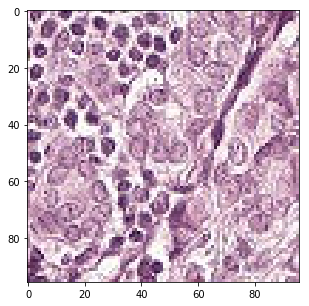

In [10]:
plt.figure(figsize=(8,5))
plt.imshow(x_train[0])

In [63]:
logf = open('./logs/magenko_train_skipped.txt', 'w')
    
t = () 
for i, x_ in enumerate(tqdm(x_train)):
    norm_x = None
    try:
        norm_x = n.transform(x_)
    except Exception as e:
        logf.write(str(i) + '; ' + str(e))
        y_train = np.delete(y_train, i+1, 0)
        continue

    t = t + (norm_x,)

logf.close()

100%|██████████| 299/299 [00:03<00:00, 75.16it/s] 


In [15]:
len(t), len(y_train)

(298, 299)

In [48]:
y_train[10]

1

In [16]:
bs_inputs = (first,) + t

In [17]:
x_train_norm = utils.build_stack(bs_inputs)

In [40]:
ind = 0

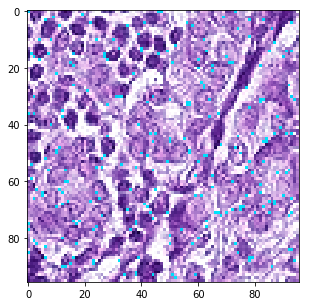

In [41]:
plt.figure(figsize=(8,5))
plt.imshow(n.transform(x_train[ind]))

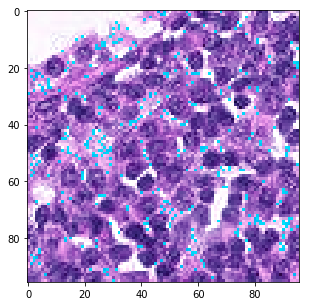

In [42]:
plt.figure(figsize=(8,5))
plt.imshow(n.transform(x_train_norm[ind]))

## Save

In [72]:
import os
import gzip

In [76]:
import numpy as np
import h5py
h5f = h5py.File('camelyonpatch_level_2_split_train_x_macenko.h5', 'w')
h5f.create_dataset('x', data=norm_stack, compression='gzip')
h5f.close()

In [59]:
from keras.utils import HDF5Matrix

In [ ]:
X_data = HDF5Matrix('input/file.hdf5', 'data')

In [62]:
x_train = HDF5Matrix('data.h5', 'dataset_1')

In [82]:
pc_train_x_h5 = gzip.open('camelyonpatch_level_2_split_train_x_macenko.h5.gz', 'rb')

In [83]:
type(pc_train_x_h5)

gzip.GzipFile

In [92]:
hede = HDF5Matrix('./camelyonpatch_level_2_split_train_x_macenko.h5.gz', 'x')

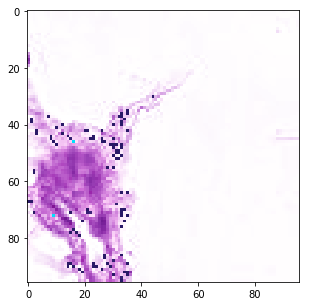

In [93]:
plt.figure(figsize=(8,5))
plt.imshow(n.transform(hede[4]))